### Create Latitude and Longitude Combinations

In [40]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

# Import the time module.
import time

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress


In [41]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [42]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [43]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination using citypy.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

### Get the City Weather Data

In [44]:
# Dependencies added above in first cell.
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [45]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | adrar
Processing Record 3 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 4 of Set 1 | leningradskiy
Processing Record 5 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | provideniya
Processing Record 8 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 9 of Set 1 | los llanos de aridane
Processing Record 10 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | port blair
Processing Record 13 of Set 1 | port alfred
Processing Record 14 of Set 1 | svetlaya
Processing Record 15 of Set 1 | manta
Processing Record 16 of Set 1 | lima
Processing Record 17 of Set 1 | vanimo
Processing Record 18 of Set 1 | bruck an der leitha
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Se

Processing Record 36 of Set 4 | utiroa
City not found. Skipping...
Processing Record 37 of Set 4 | touros
Processing Record 38 of Set 4 | la ronge
Processing Record 39 of Set 4 | deniliquin
Processing Record 40 of Set 4 | beringovskiy
Processing Record 41 of Set 4 | zaragoza
Processing Record 42 of Set 4 | tromso
Processing Record 43 of Set 4 | sitka
Processing Record 44 of Set 4 | aklavik
Processing Record 45 of Set 4 | stephenville
Processing Record 46 of Set 4 | saint-philippe
Processing Record 47 of Set 4 | sistranda
Processing Record 48 of Set 4 | juneau
Processing Record 49 of Set 4 | hofn
Processing Record 50 of Set 4 | katima mulilo
Processing Record 1 of Set 5 | nishihara
Processing Record 2 of Set 5 | chara
Processing Record 3 of Set 5 | celestun
Processing Record 4 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 5 of Set 5 | macaboboni
City not found. Skipping...
Processing Record 6 of Set 5 | north bend
Processing Record 7 of Set 5 | urusha
Processing

Processing Record 20 of Set 8 | pafos
Processing Record 21 of Set 8 | santa cruz
Processing Record 22 of Set 8 | catalina
Processing Record 23 of Set 8 | ponta delgada
Processing Record 24 of Set 8 | semirom
Processing Record 25 of Set 8 | acarau
Processing Record 26 of Set 8 | bintulu
Processing Record 27 of Set 8 | caravelas
Processing Record 28 of Set 8 | teseney
Processing Record 29 of Set 8 | torbay
Processing Record 30 of Set 8 | kailua
Processing Record 31 of Set 8 | grand gaube
Processing Record 32 of Set 8 | rundu
Processing Record 33 of Set 8 | sofiysk
City not found. Skipping...
Processing Record 34 of Set 8 | opuwo
Processing Record 35 of Set 8 | norman wells
Processing Record 36 of Set 8 | yulara
Processing Record 37 of Set 8 | bowen
Processing Record 38 of Set 8 | russell
Processing Record 39 of Set 8 | arlit
Processing Record 40 of Set 8 | hamilton
Processing Record 41 of Set 8 | bondo
Processing Record 42 of Set 8 | bargal
City not found. Skipping...
Processing Record 4

Processing Record 10 of Set 12 | lom sak
Processing Record 11 of Set 12 | tabialan
City not found. Skipping...
Processing Record 12 of Set 12 | maniitsoq
Processing Record 13 of Set 12 | randolph
Processing Record 14 of Set 12 | senekal
Processing Record 15 of Set 12 | byron bay
Processing Record 16 of Set 12 | praia da vitoria
Processing Record 17 of Set 12 | saldanha
Processing Record 18 of Set 12 | husavik
Processing Record 19 of Set 12 | kindu
Processing Record 20 of Set 12 | matamoros
Processing Record 21 of Set 12 | hoopstad
Processing Record 22 of Set 12 | pareora
Processing Record 23 of Set 12 | port alberni
Processing Record 24 of Set 12 | kenai
Processing Record 25 of Set 12 | horn lake
Processing Record 26 of Set 12 | orgun
City not found. Skipping...
Processing Record 27 of Set 12 | rungata
City not found. Skipping...
Processing Record 28 of Set 12 | baena
Processing Record 29 of Set 12 | arrecife
Processing Record 30 of Set 12 | new iberia
Processing Record 31 of Set 12 | 

In [48]:
# checking number of cities added to city_data.
len(city_data)

556

### Create a DataFrame of City Weather Data

In [64]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.80,-68.30,46.40,81,75,19.46,AR,2020-02-17 03:11:48
1,Adrar,20.50,-10.07,70.61,17,100,10.71,MR,2020-02-17 03:14:13
2,Leningradskiy,69.38,178.42,-22.94,93,35,3.13,RU,2020-02-17 03:14:14
3,Mataura,-46.19,168.86,64.00,81,24,8.99,NZ,2020-02-17 03:14:14
4,Provideniya,64.38,-173.30,3.20,84,90,24.61,RU,2020-02-17 03:14:14
5,Los Llanos De Aridane,28.66,-17.92,66.99,72,75,11.41,ES,2020-02-17 03:14:15
6,Albany,42.60,-73.97,36.00,55,40,4.70,US,2020-02-17 03:14:15
7,Port Blair,11.67,92.75,73.40,83,40,2.24,IN,2020-02-17 03:14:15
8,Port Alfred,-33.59,26.89,70.00,91,100,5.99,ZA,2020-02-17 03:14:16
9,Svetlaya,46.54,138.33,16.66,90,100,35.01,RU,2020-02-17 03:14:16


In [65]:
# reorder columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2020-02-17 03:11:48,-54.80,-68.30,46.40,81,75,19.46
1,Adrar,MR,2020-02-17 03:14:13,20.50,-10.07,70.61,17,100,10.71
2,Leningradskiy,RU,2020-02-17 03:14:14,69.38,178.42,-22.94,93,35,3.13
3,Mataura,NZ,2020-02-17 03:14:14,-46.19,168.86,64.00,81,24,8.99
4,Provideniya,RU,2020-02-17 03:14:14,64.38,-173.30,3.20,84,90,24.61
5,Los Llanos De Aridane,ES,2020-02-17 03:14:15,28.66,-17.92,66.99,72,75,11.41
6,Albany,US,2020-02-17 03:14:15,42.60,-73.97,36.00,55,40,4.70
7,Port Blair,IN,2020-02-17 03:14:15,11.67,92.75,73.40,83,40,2.24
8,Port Alfred,ZA,2020-02-17 03:14:16,-33.59,26.89,70.00,91,100,5.99
9,Svetlaya,RU,2020-02-17 03:14:16,46.54,138.33,16.66,90,100,35.01


In [53]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

### Plot Latitude vs. Temperature

In [54]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

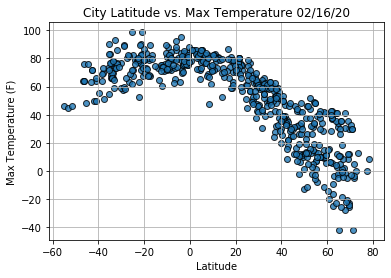

In [55]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

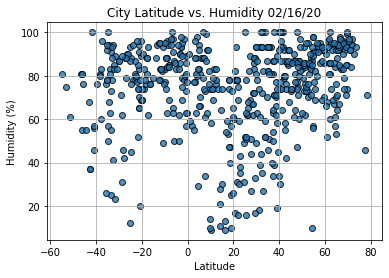

In [56]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

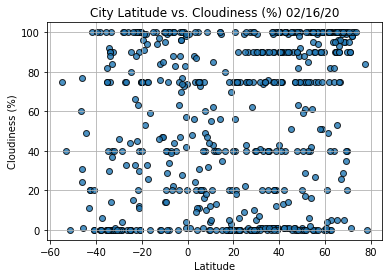

In [57]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

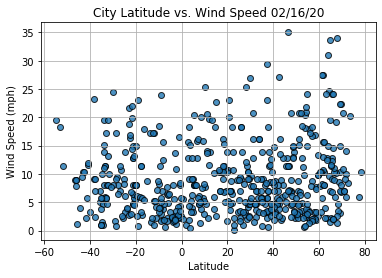

In [58]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

### Create a Linear Regression Function

In [102]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    print(f"The slope is: {slope:.2f}")
    print(f"The y-intercept is: {intercept:.2f}")
    print(f"The correlation coefficient is: {r_value:.3f}")
    print(f"The p_value is: {p_value:.3f}")
    print(f"The standard deviation is: {std_err:.2f}")
    

In [60]:
# returns all the data at a specific row using index
index13 = city_data_df.loc[13]
index13

City          Bruck An Der Leitha
Country                        AT
Date          2020-02-17 03:14:17
Lat                         48.02
Lng                         16.77
Max Temp                    42.01
Humidity                       75
Cloudiness                     63
Wind Speed                   6.93
Name: 13, dtype: object

In [61]:
# Executing this code will return either “True” or “False” for all the rows that meet these criteria.
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3      False
4       True
       ...  
551     True
552     True
553     True
554     True
555     True
Name: Lat, Length: 556, dtype: bool

In [33]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

### Perform Linear Regression on the Maximum Temperature for the Hemispheres

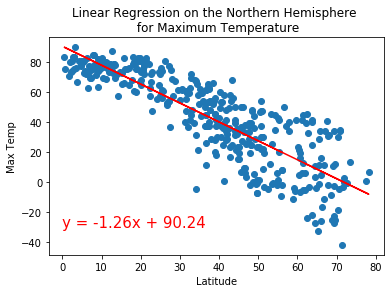

The slope is: -1.26
The y-intercept is: 90.24
The correlation coefficient is: -0.846
The p_value is: 0.000
The standard deviation is: 0.04


In [103]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, 
                       y_values,
                       f"Linear Regression on the Northern Hemisphere \n for Maximum Temperature",
                       'Max Temp',
                       (0,-30))


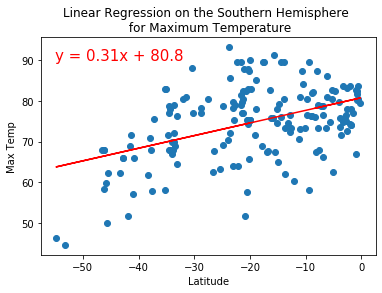

The slope is: 0.31
The y-intercept is: 80.80
The correlation coefficient is: 0.457
The p_value is: 0.000
The standard deviation is: 0.05


In [104]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, 
                       y_values,
                       f"Linear Regression on the Southern Hemisphere \n for Maximum Temperature",
                       'Max Temp',
                       (-55,90))

### Perform Linear Regression on the Percent Humidity for the Hemispheres

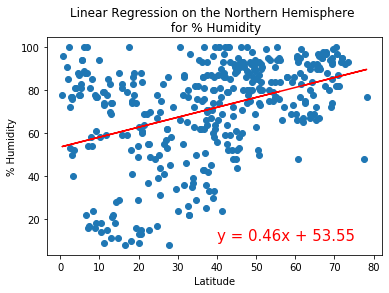

The slope is: 0.46
The y-intercept is: 53.55
The correlation coefficient is: 0.391
The p_value is: 0.000
The standard deviation is: 0.06


In [105]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, 
                       y_values,
                       f"Linear Regression on the Northern Hemisphere \n for % Humidity",
                       '% Humidity',
                       (40,10))


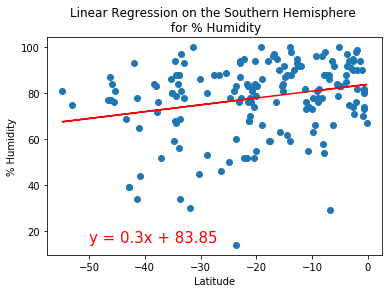

The slope is: 0.30
The y-intercept is: 83.85
The correlation coefficient is: 0.249
The p_value is: 0.001
The standard deviation is: 0.09


In [106]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, 
                       y_values,
                       f"Linear Regression on the Southern Hemisphere \n for % Humidity",
                       '% Humidity',
                       (-50,15))

### Perform Linear Regression on the Percent Cloudiness for the Hemispheres

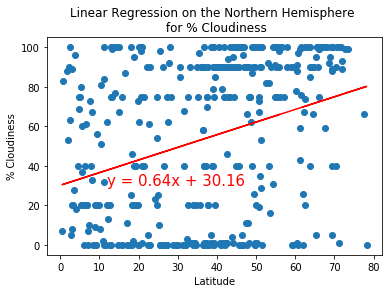

The slope is: 0.64
The y-intercept is: 30.16
The correlation coefficient is: 0.320
The p_value is: 0.000
The standard deviation is: 0.10


In [111]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, 
                       y_values,
                       f"Linear Regression on the Northern Hemisphere \n for % Cloudiness",
                       '% Cloudiness',
                       (12,30))

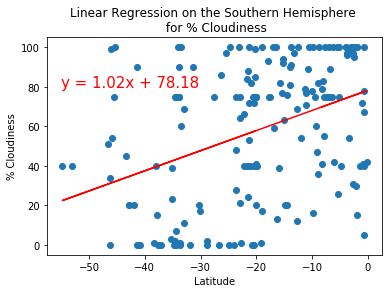

The slope is: 1.02
The y-intercept is: 78.18
The correlation coefficient is: 0.389
The p_value is: 0.000
The standard deviation is: 0.18


In [115]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, 
                       y_values,
                       f"Linear Regression on the Southern Hemisphere \n for % Cloudiness",
                       '% Cloudiness',
                       (-55,80))

### Perform Linear Regression on the Wind Speed for the Hemispheres

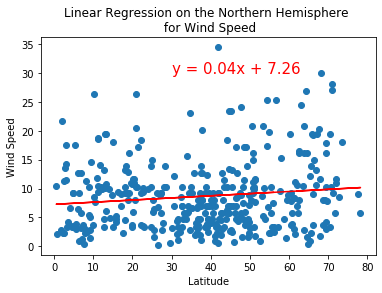

The slope is: 0.04
The y-intercept is: 7.26
The correlation coefficient is: 0.122
The p_value is: 0.017
The standard deviation is: 0.02


In [118]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, 
                       y_values,
                       f"Linear Regression on the Northern Hemisphere \n for Wind Speed",
                       'Wind Speed',
                       (30,30))

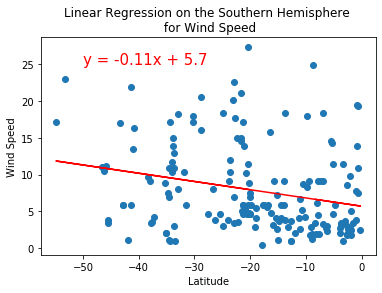

The slope is: -0.11
The y-intercept is: 5.70
The correlation coefficient is: -0.254
The p_value is: 0.001
The standard deviation is: 0.03


In [120]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, 
                       y_values,
                       f"Linear Regression on the Southern Hemisphere \n for Wind Speed",
                       'Wind Speed',
                       (-50,25))